# Feature Engineering and Selection
## Prerequisite

In [60]:
# helper packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import sklearn 
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Cali dataset

In [61]:
# read california housing dataset
cali = pd.read_csv("../data/housing.csv")
# show dimensions
cali.shape

(20640, 10)

In [62]:
# show data types and other details in the dataset
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [63]:
# show 20 random rows
cali.sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8472,-118.32,33.91,35.0,940.0,197.0,640.0,215.0,4.2000,181300.0,<1H OCEAN
11212,-117.91,33.82,29.0,1444.0,326.0,1038.0,271.0,2.3843,182900.0,<1H OCEAN
14056,-117.13,32.75,31.0,2336.0,656.0,1186.0,609.0,2.5872,130600.0,NEAR OCEAN
8747,-118.35,33.82,28.0,7591.0,1710.0,3420.0,1635.0,4.0708,328900.0,<1H OCEAN
6880,-118.09,34.07,45.0,726.0,146.0,568.0,160.0,3.0347,183200.0,<1H OCEAN
9575,-120.58,37.36,33.0,3564.0,716.0,2603.0,696.0,2.2179,67500.0,INLAND
4298,-118.29,34.09,28.0,1562.0,648.0,1974.0,597.0,1.9766,112500.0,<1H OCEAN
15050,-116.85,32.83,17.0,4234.0,770.0,2191.0,725.0,3.6445,197600.0,<1H OCEAN
8550,-118.35,33.88,36.0,1567.0,362.0,1054.0,386.0,3.2594,233900.0,<1H OCEAN
17070,-122.26,37.53,4.0,5233.0,1109.0,1690.0,907.0,6.2007,311800.0,NEAR BAY


In [64]:
# how many null values do we have
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [65]:
# how many duplicated rows do we have
cali.duplicated().sum()

0

In [66]:
# statistical description of the dataset
cali.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [67]:
# correlation between features
cali.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [68]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:>

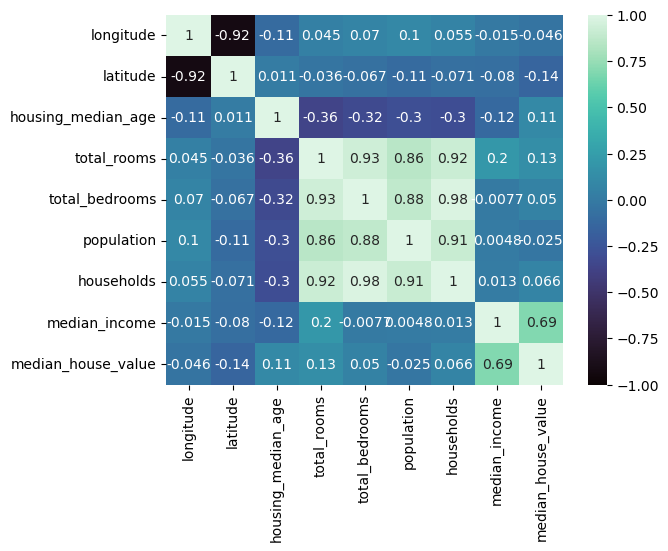

In [69]:
sns.heatmap(cali.corr(),cmap='mako', annot=True, vmin=-1, vmax=1)

In [70]:
# featues
X = cali.drop("median_house_value", axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [71]:
# target variable
Y = cali["median_house_value"]
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

## Check for non-informative predictors
### Feature variance
After testing for feature variace, we could see that there were no constant features, so none were deleted

In [72]:
# remove low variance features
var_thres = VarianceThreshold(threshold=0)
# exception for categorical features
var_thres.fit(X.drop("ocean_proximity", axis=1))
# shows which column is non constant (True)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Check for imbalanced distributions
Check for factor variable where some levels are very common while others very rare. After using value counts on ocean proximity feature, we can see that 'NEAR OCEAN', 'NEAR BAY' and 'ISLAND' have way lower value counts, in this case we can use Lumping to group them together into one category called 'OTHER'

In [73]:
X["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [74]:
# replace values 'near ocean' 'near bay' and 'island' with 'other'
X["ocean_proximity"] = X["ocean_proximity"].replace(['NEAR OCEAN', 'NEAR BAY', 'ISLAND'], 'OTHER')
#X = pd.get_dummies(data=X,drop_first=True)
#X = X.dropna()

In [75]:
X["ocean_proximity"].value_counts()

<1H OCEAN    9136
INLAND       6551
OTHER        4953
Name: ocean_proximity, dtype: int64

In [76]:
#OLSmodel = sm.OLS(Y,X)
#fit = OLSmodel.fit()
#fit.summary()

## Check for missingness

<AxesSubplot:>

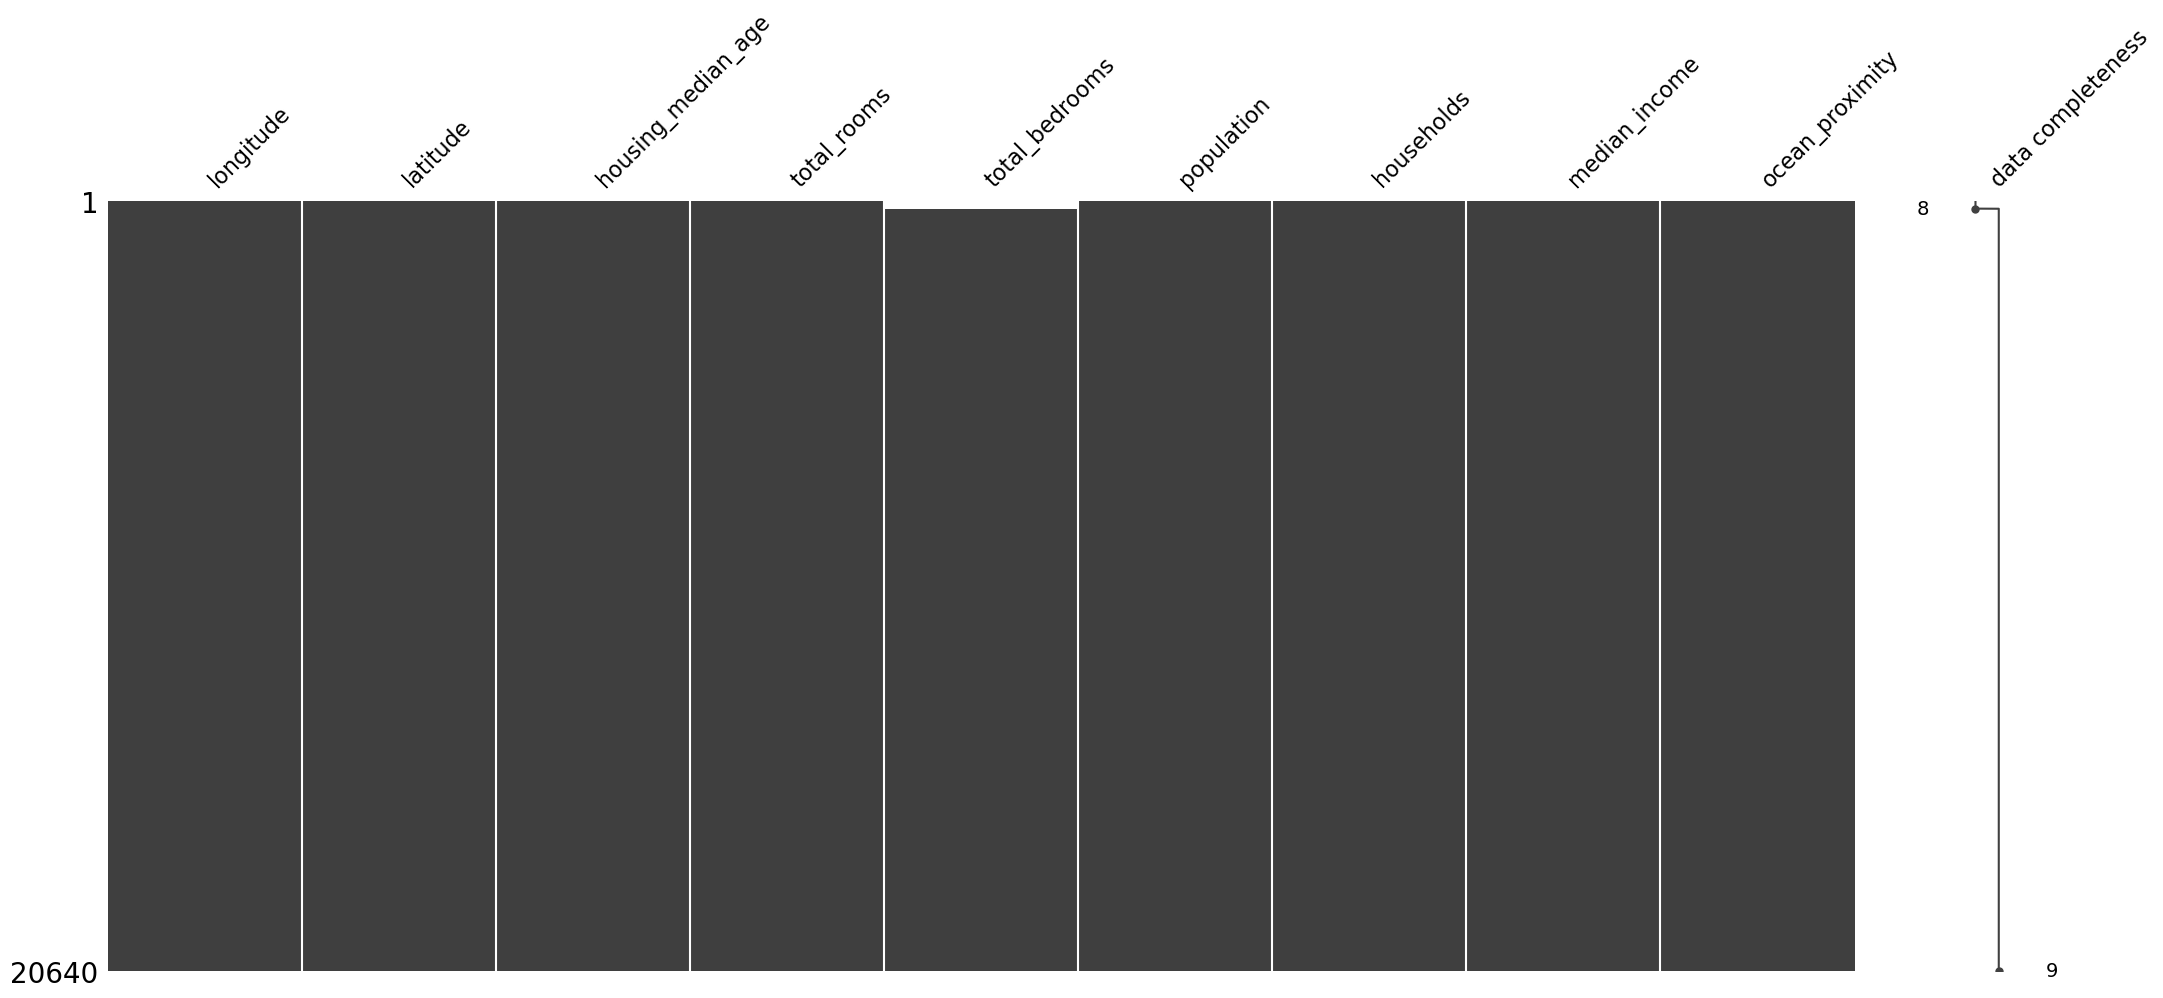

In [77]:
msno.matrix(X, labels=True, filter="bottom", sort="ascending", n=50)

Reason for missingness: 
from the mask it seems its missing at random.

In [78]:
X[X['total_bedrooms'].isna()].sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14462,-117.27,32.85,26.0,1373.0,NaN,608.0,268.0,4.4250,OTHER
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,<1H OCEAN
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,OTHER
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,OTHER
6421,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,INLAND
3958,-118.59,34.20,21.0,1789.0,NaN,2300.0,677.0,2.7540,<1H OCEAN
14015,-117.17,32.75,52.0,1052.0,NaN,381.0,201.0,3.0726,OTHER
5236,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,<1H OCEAN
6241,-117.97,34.06,31.0,2516.0,NaN,2194.0,497.0,3.2413,<1H OCEAN


In [79]:
X = X.dropna()

## Check for extreme values
### outlier detection
Note that extreme value detection and removal only applies to numerical features. To do it we first plot a boxplot of some feature, if we notice it has outliers we run the outlier removal function

<AxesSubplot:>

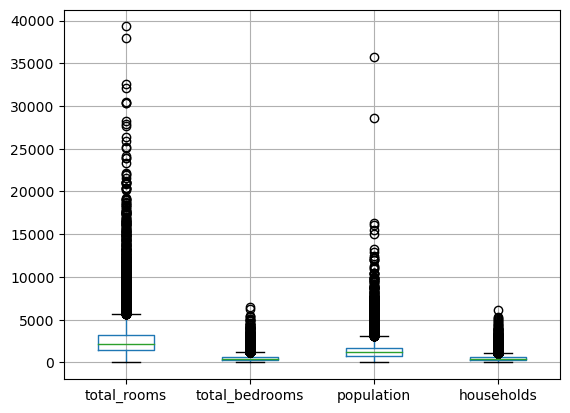

In [80]:
X.boxplot(["total_rooms", "total_bedrooms", "population", "households"])

<AxesSubplot:xlabel='median_income'>

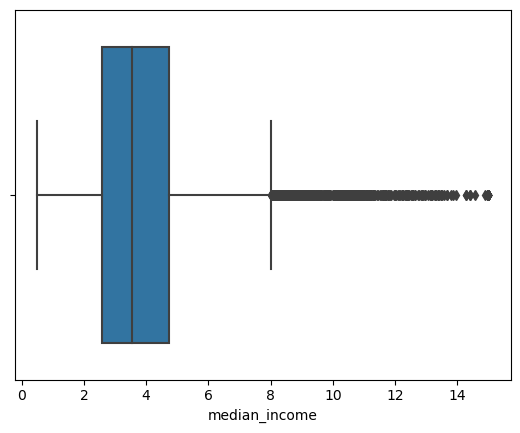

In [81]:
sns.boxplot(x=X["median_income"])

### outlier removal

In [82]:
for x in ['median_income']:
    q75,q25 = np.percentile(X.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    X.loc[X[x] < min,x] = np.nan
    X.loc[X[x] > max,x] = np.nan

In [83]:
for x in ["total_rooms"]:
    q75,q25 = np.percentile(X.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    X.loc[X[x] < min,x] = np.nan
    X.loc[X[x] > max,x] = np.nan

In [84]:
for x in ["total_bedrooms"]:
    q75,q25 = np.percentile(X.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    X.loc[X[x] < min,x] = np.nan
    X.loc[X[x] > max,x] = np.nan

In [85]:
for x in ["population"]:
    q75,q25 = np.percentile(X.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    X.loc[X[x] < min,x] = np.nan
    X.loc[X[x] > max,x] = np.nan

In [86]:
for x in ["households"]:
    q75,q25 = np.percentile(X.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    X.loc[X[x] < min,x] = np.nan
    X.loc[X[x] > max,x] = np.nan

In [87]:
X.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
ocean_proximity          0
dtype: int64

In [88]:
X = X.dropna(axis = 0)

<AxesSubplot:>

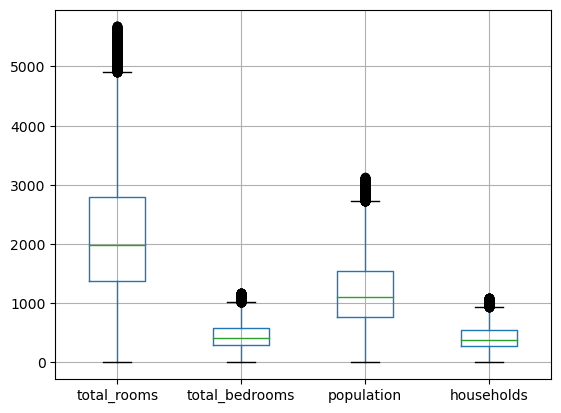

In [89]:
# after dropping missing values
X.boxplot(["total_rooms", "total_bedrooms", "population", "households"])

## Check for skewness

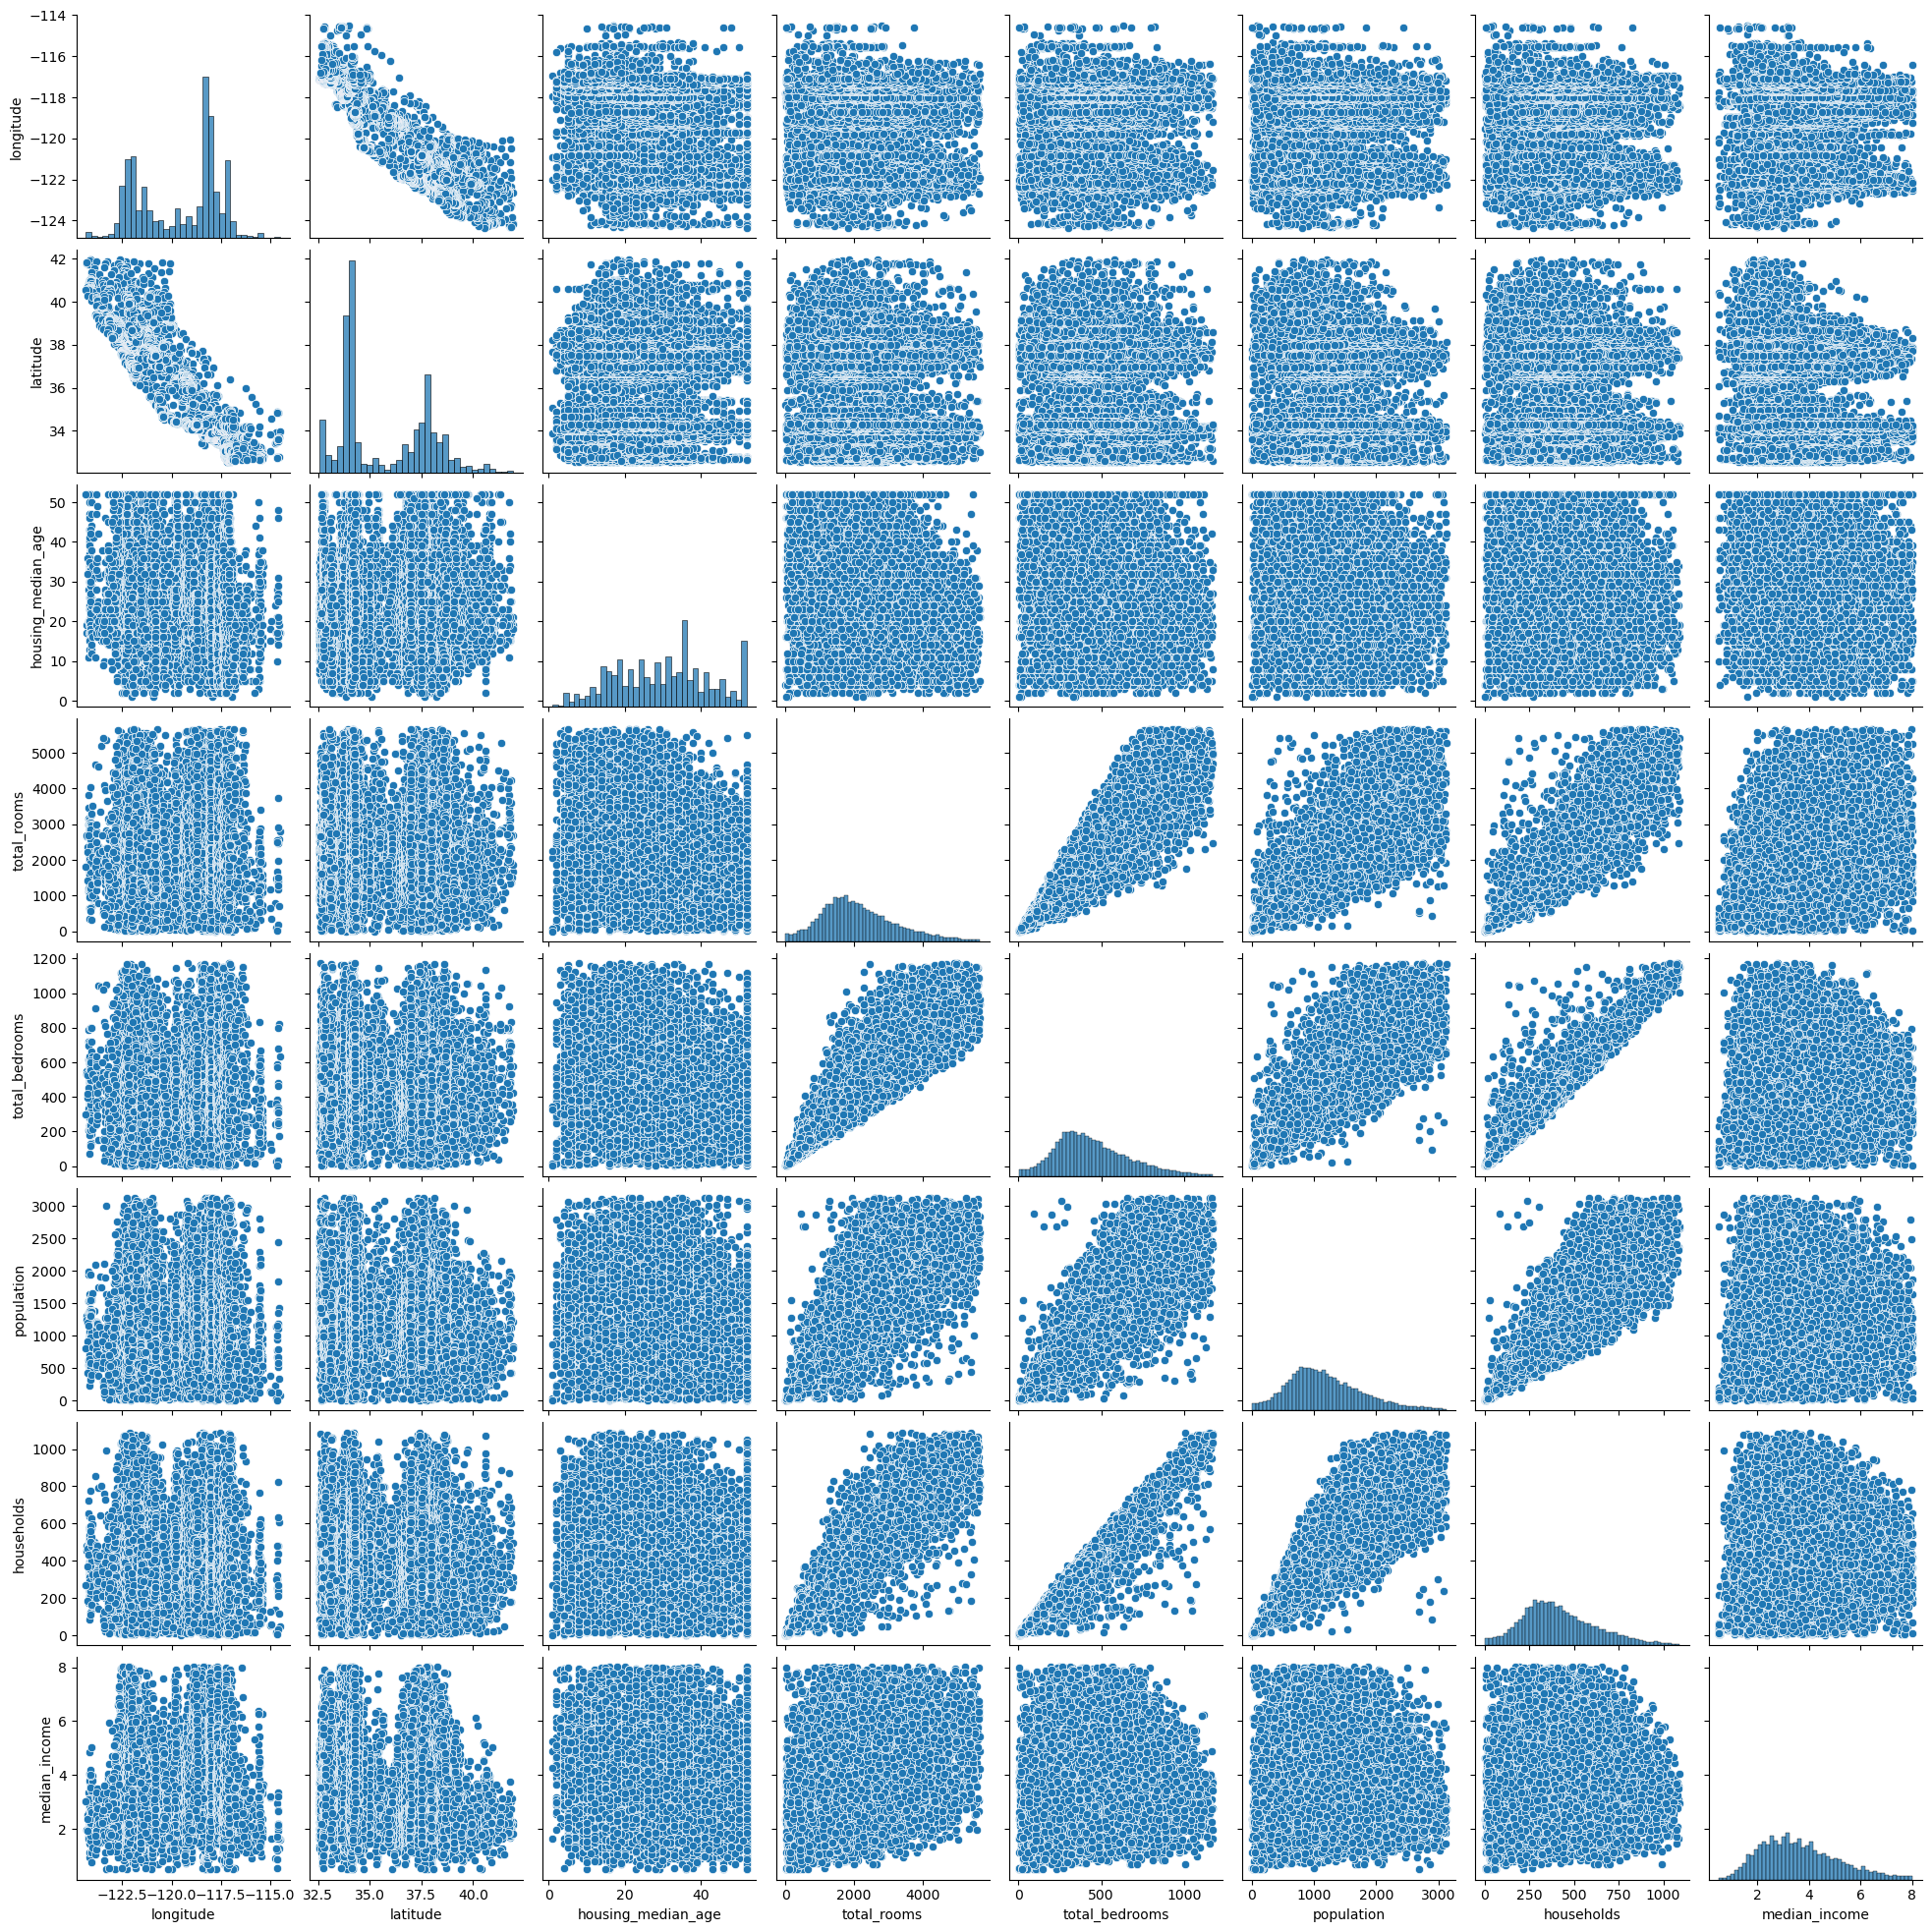

In [90]:
sns.pairplot(X, plot_kws=dict());

from this plot we can see there is right skew for these features total_rooms , total_bedrooms, population, households and median_income and we want to take log transformation

In [91]:
X['log_total_rooms']= np.log(X.total_rooms)
X['log_total_bedrooms']= np.log(X.total_bedrooms)
X['log_population']= np.log(X.population)
X['log_households']= np.log(X.households)
X['log_median_income']= np.log(X.median_income)

In [92]:
#OLSmodel = sm.OLS(Y,X)
#fit = OLSmodel.fit()
#fit.summary()

## Data Standardization

In [94]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= X.index, columns= X.columns)
X

ValueError: could not convert string to float: 'OTHER'

## Check for redundant features

## Dimension reduction

## Dummy encoding

In [ ]:
# encode categorical variables as numeric using dummy encoding
X=pd.get_dummies(data=X,drop_first=True)
X

# Target Transformation
## Check for skewness

In [96]:
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [ ]:
Y['log_median_house_value']= np.log(Y)


In [99]:
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: object

In [101]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Y.corr()[['log_median_house_value']].sort_values(by='log_median_house_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(250, 30, l=65, as_cmap=True))


TypeError: corr() missing 1 required positional argument: 'other'

<Figure size 800x1200 with 0 Axes>